# Import biblioteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import datetime

x = datetime.datetime.now()
print('Početak analize: ',x)

Početak analize:  2025-04-20 23:40:10.147063


# Učitavanje i analiza podataka
Originalni skup podataka inicijalno je podijeljen na trening i testni skup te se ta podjela zadržava i u daljem radu.
Zarad uvida u karakteristike cjelokupnog skupa podataka, izvršeno je i spajanje ovih podskupova. 

In [3]:
X_test= pd.read_csv('X_test.txt', sep='\s+')
y_test= pd.read_csv('y_test.txt', sep='\s+')
X_train= pd.read_csv('X_train.txt', sep='\s+')
y_train= pd.read_csv('y_train.txt', sep='\s+')

In [4]:
podaci_test = pd.concat([X_test, y_test], axis=1)
podaci_train = pd.concat([X_train, y_train], axis=1)

In [5]:
podaci_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Class
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [6]:
#podaci_train.tail(35)

In [7]:
podaci = pd.concat([podaci_train, podaci_test], axis=0)

In [8]:
#broj redova, kolona
podaci.shape

(10299, 562)

In [9]:
#kljucevi, tj. atributi
podaci.keys()

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Class'],
      dtype='object', length=562)

In [10]:
#prvih 5 redova
podaci.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [11]:
jedan_po_klasi = podaci.groupby('Class').first().reset_index()
jedan_po_klasi

,Class,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,...,-0.151642,-0.312137,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099
1,2,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,...,-0.006607,-0.331470,-0.685946,0.198799,-0.515058,-0.960808,0.798595,-0.730180,0.275743,0.075790
2,3,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,...,0.002068,-0.299425,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474
3,4,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,...,-0.257607,0.156185,-0.241781,0.013526,0.043354,0.021485,0.046689,-0.667085,0.054216,-0.218875
4,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
5,6,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,...,-0.274891,0.383907,-0.021764,-0.068580,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876


In [12]:
#informacije o atributima
podaci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 562 entries, tBodyAcc-mean()-X to Class
dtypes: float64(561), int64(1)
memory usage: 44.2 MB


In [13]:
#provjeravamo da li su u skupu prisutne nedostajuće vrijednosti - NE
podaci.isna().any().any() 

False

In [14]:
#provjera raspodjele za klase
podaci["Class"].value_counts()

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: Class, dtype: int64

In [15]:
#provjera raspodjele za klase
podaci_test["Class"].value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
Name: Class, dtype: int64

In [16]:
#provjera raspodjele za klase
podaci_train["Class"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Class, dtype: int64

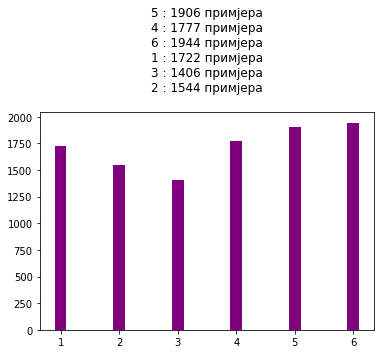

In [17]:
klase = list(podaci["Class"].unique())
broj_u_klasi = []
naziv = ""

for i in klase:
    broj = list(podaci["Class"]).count(i)
    naziv += f"{i} : {broj} примјера\n"
    broj_u_klasi.append(broj)

x_osa = klase
y_osa = broj_u_klasi
plt.bar(x_osa, y_osa,width = 0.2, color='purple' )

plt.title(naziv)
plt.show()

Uočava se da je riječ o balansiranom skupu

In [18]:
print('Broj duplikata u skupu:', podaci.duplicated().sum())

Broj duplikata u skupu: 0


In [19]:
#statistički podaci
statistika = podaci.describe().round(2)

# promjena naziva
statistika = statistika.rename(index={
    'count': 'укупно врста',
    'mean': 'средња вриједност',
    'std': 'стандардна девијација',
    'min': 'минимум',
    '25%': '25. перцентил',
    '50%': 'медијана',
    '75%': '75. перцентил',
    'max': 'максимум'
})

statistika

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Class
укупно врста,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,...,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00
средња вриједност,0.27,-0.02,-0.11,-0.61,-0.51,-0.61,-0.63,-0.53,-0.61,-0.47,...,-0.30,-0.62,0.01,0.00,0.02,-0.01,-0.50,0.06,-0.05,3.62
стандардна девијација,0.07,0.04,0.05,0.44,0.50,0.40,0.41,0.48,0.40,0.54,...,0.32,0.31,0.34,0.45,0.62,0.48,0.51,0.31,0.27,1.74
минимум,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
25. перцентил,0.26,-0.02,-0.12,-0.99,-0.98,-0.98,-0.99,-0.98,-0.98,-0.94,...,-0.54,-0.84,-0.12,-0.29,-0.49,-0.39,-0.82,0.00,-0.13,2.00
медијана,0.28,-0.02,-0.11,-0.94,-0.84,-0.85,-0.95,-0.84,-0.85,-0.87,...,-0.34,-0.70,0.01,0.01,0.02,-0.01,-0.72,0.18,-0.00,4.00
75. перцентил,0.29,-0.01,-0.10,-0.25,-0.06,-0.28,-0.30,-0.09,-0.29,-0.01,...,-0.11,-0.49,0.15,0.29,0.54,0.37,-0.52,0.25,0.10,5.00
максимум,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00


In [20]:
#srednje vrijednosti po klasama
podaci.groupby('Class').mean()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Class,,,,,,,,,,,,,,,,,,,,,
1,0.276337,-0.017907,-0.108882,-0.314644,-0.023583,-0.273921,-0.352470,-0.055491,-0.274098,-0.113458,...,0.130806,-0.071308,-0.400268,0.014918,-0.007011,0.011332,-0.019443,-0.761886,0.218599,0.059771
2,0.262295,-0.025923,-0.120538,-0.237990,-0.016033,-0.175450,-0.297094,-0.030865,-0.172811,-0.015003,...,0.094112,-0.361533,-0.682468,0.035371,0.006652,-0.129903,0.036432,-0.637980,0.278642,0.122794
3,0.288137,-0.016312,-0.105762,0.100766,0.059549,-0.190805,0.032426,0.003907,-0.214569,0.417152,...,0.095759,-0.277020,-0.618394,-0.039692,-0.018665,0.203588,-0.076029,-0.780873,0.200189,0.055866
4,0.273060,-0.012690,-0.105517,-0.983446,-0.934881,-0.938982,-0.985280,-0.934798,-0.936671,-0.926703,...,0.177739,-0.384740,-0.686795,0.012034,0.002458,0.013413,-0.033260,-0.706042,0.006140,-0.089532
5,0.279153,-0.016152,-0.106587,-0.984435,-0.932509,-0.939914,-0.987205,-0.933875,-0.937739,-0.921265,...,0.084865,-0.343769,-0.654989,0.006991,0.010397,0.004614,0.015957,-0.774143,0.209818,0.031743
6,0.268649,-0.018318,-0.107436,-0.960932,-0.943507,-0.948069,-0.963395,-0.944099,-0.947261,-0.911610,...,0.165728,-0.342490,-0.658640,0.010366,0.016013,0.022788,0.009191,0.520261,-0.435944,-0.427749


In [21]:
#zbog velikog broja atributa nije pregledno i predugo traje
#konv_podaci.corr()

#Sadrži koeficijente korelacije između svakog para numeričkih kolona. Pirsonov koeficijent korelacije mjeri linearnu vezu između
#dvije varijable, uzimajući vrijednosti od -1 do 1, gdje +1 ukazuje n savršenu pozitivnu linearnu vezu, 
#a -1 na savršenu negativnu linearnu vezu, dok 0 ukazuje na odsustvo povezanosti.
#Vrijednost koeficijenta treba da je bar 0.6 (-0.6) da vi se smatrala dobrom korelacijom.

#matrica korelacije - zbog velikog broja atributa nema preglednosti
#sns.heatmap(konv_podaci.corr(), annot=True)

In [22]:
# Filtriranje visoko korelisanih atributa (npr. korelacija > 0.9)
#threshold = 0.9
#high_corr_pairs = []

#for i in range(len(correlation_matrix.columns)):
#    for j in range(i):
#        if abs(correlation_matrix.iloc[i, j]) > threshold:
#            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Prikaz visoko korelisanih parova
#for pair in high_corr_pairs:
#    print(f"Visoka korelacija između {pair[0]} i {pair[1]}: {pair[2]:.2f}")

In [23]:
def matrica_predv(conf_matrica):
    cm_df = pd.DataFrame(conf_matrica, index=[f"Стварна вриједност {i+1}" for i in range(6)], columns=[f"Предикција {i+1}" for i in range(6)])

    # Prikaz tabele
    return cm_df

In [24]:
def klas_izv (y_skup,X_skup_predikcija, skup):
    izvjestaj=metrics.classification_report(y_skup, X_skup_predikcija, output_dict=True)
     
    izvjestaj_df=pd.DataFrame(izvjestaj).transpose()
    izvjestaj_df['support'] = izvjestaj_df['support'].round().astype(int)
    
    izvjestaj_df = izvjestaj_df.rename(columns={
            'precision': 'Прецизност',
            'recall': 'Одзив',
            'f1-score': 'f1-score',
            'support': 'Број узорака у класи'  # Ovaj naziv se koristi za broj uzoraka u svakoj klasi
        })

    izvjestaj_df = izvjestaj_df.rename(index={
            '1': 'Пјешачење',
            '2': 'Пењање уз степенице',
            '3': 'Силазак низ степенице',
            '4': 'Сједење',
            '5': 'Стајање',
            '6': 'Лежање',
            'accuracy': 'Тачност',
            'macro avg': 'Макро просјек',  #prosečne vrijednosti metrika za sve klase, bez ponderisanja u zavisnosti od broja uzoraka u svakoj klasi.
            'weighted avg': 'Пондерисани просјек'
        })
 
   
        
    return  izvjestaj_df

# Standardizacija 

Standardizacija podataka se radi da bi se obezbijedilo da pojedinačne vrijednosti podataka i jedinice u kojima su uizrađene ne utiču na učenje - nastoji se postići da podaci imaju normalnu raspodjelu - Gausovu raspodjelu sa srednjom vrijednošću 0 i varijansom 1.

U praksi, podaci se transformišu na način da se uradi centriranje oduzimanjem srednje vrijednosti svake osobine, a zatim se skaliraju dijeljenjem vrijednosti njihovom standardnom devijacijom.

In [25]:
#Standardizacija trening skupa

# Za kolonu Class ne radi se standardizacija

# Inicijalizacija StandardScaler
scaler = StandardScaler()

# Primjena standardizacije
st_X_train = scaler.fit_transform(X_train)

# Prevođenje podataka u dataframe
st_X_train = pd.DataFrame(st_X_train, columns=X_train.columns)

st_X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


In [26]:
st_statistika_train = st_X_train.describe().round(2)

# promjena naziva
st_statistika_train = st_statistika_train.rename(index={
    'count': 'укупно врста',
    'mean': 'средња вриједност',
    'std': 'стандардна девијација',
    'min': 'минимум',
    '25%': '25. перцентил',
    '50%': 'медијана',
    '75%': '75. перцентил',
    'max': 'максимум'
})

st_statistika_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
укупно врста,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,...,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00
средња вриједност,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
стандардна девијација,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
минимум,-18.14,-24.07,-15.73,-0.88,-0.97,-0.94,-0.87,-0.97,-0.95,-0.98,...,-4.48,-2.14,-1.22,-2.93,-2.24,-1.66,-2.08,-1.00,-3.56,-3.38
25. перцентил,-0.16,-0.18,-0.21,-0.86,-0.93,-0.90,-0.86,-0.93,-0.90,-0.86,...,-0.59,-0.73,-0.72,-0.39,-0.65,-0.81,-0.77,-0.63,-0.26,-0.31
медијана,0.04,0.01,0.01,-0.76,-0.68,-0.61,-0.76,-0.68,-0.61,-0.76,...,0.03,-0.11,-0.28,0.00,0.02,0.00,0.01,-0.43,0.42,0.21
75. перцентил,0.20,0.17,0.20,0.81,0.95,0.82,0.80,0.95,0.82,0.83,...,0.65,0.56,0.39,0.42,0.65,0.82,0.76,-0.04,0.64,0.59
максимум,10.33,24.94,19.59,3.58,2.84,3.83,3.85,3.08,3.88,2.70,...,3.27,4.04,5.14,2.94,2.23,1.63,2.10,2.91,1.41,3.79


In [27]:
#Standardizacija testnog skupa

# Za kolonu Class ne radi se standardizacija

# Inicijalizacija StandardScaler
scaler = StandardScaler()

# Primjena standardizacije
st_X_test = scaler.fit_transform(X_test)

# Prevođenje podataka u dataframe
st_X_test = pd.DataFrame(st_X_test, columns=X_test.columns)


st_X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.253663,-0.166391,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,-2.300750,0.491021,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.291563,0.274821,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.058625,-0.210678,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-1.090781,-0.810527,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.597072,-1.380212,0.217067,0.789690,0.744135,1.154623,0.740507,0.779257,1.132204,1.235951,...,-0.241427,-0.311121,-0.488935,-1.019623,0.769650,1.330760,-1.359840,-0.270682,0.616018,0.967186
2943,1.476032,-0.829444,0.057817,0.747216,1.085580,1.206230,0.695181,1.026724,1.025466,1.235951,...,-0.122855,-0.135013,-0.326438,-2.207635,-0.846487,-1.098551,0.678029,-0.277456,0.612784,0.957360
2944,1.254458,1.862441,-0.173180,0.688432,0.943345,1.057851,0.657591,0.811598,0.810778,0.896354,...,-0.850662,0.500453,0.423089,-0.555875,0.190504,1.034263,0.759011,-0.277802,0.615561,0.952271
2945,-0.601088,1.411385,0.278129,0.704246,0.563664,1.175343,0.646262,0.506579,0.971675,0.896354,...,-0.765017,0.227458,-0.061034,1.307070,-1.849401,1.400679,0.017755,-0.286369,0.585654,0.978695


In [28]:
st_statistika_test = st_X_test.describe().round(2)

# promjena naziva
st_statistika_test = st_statistika_test.rename(index={
    'count': 'укупно врста',
    'mean': 'средња вриједност',
    'std': 'стандардна девијација',
    'min': 'минимум',
    '25%': '25. перцентил',
    '50%': 'медијана',
    '75%': '75. перцентил',
    'max': 'максимум'
})

st_statistika_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
укупно врста,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,...,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00
средња вриједност,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
стандардна девијација,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
минимум,-14.30,-13.40,-10.95,-0.94,-0.99,-1.01,-0.93,-0.99,-1.01,-0.94,...,-3.96,-2.28,-1.29,-2.99,-2.24,-1.64,-1.94,-0.92,-3.05,-3.73
25. перцентил,-0.20,-0.28,-0.30,-0.91,-0.94,-0.94,-0.91,-0.94,-0.95,-0.90,...,-0.60,-0.76,-0.74,-0.40,-0.64,-0.88,-0.82,-0.62,-0.16,-0.21
медијана,0.05,0.03,-0.00,-0.77,-0.57,-0.53,-0.77,-0.58,-0.50,-0.75,...,0.05,-0.11,-0.27,-0.00,0.01,0.01,-0.02,-0.42,0.33,0.16
75. перцентил,0.23,0.30,0.26,0.84,0.81,0.89,0.83,0.81,0.88,0.86,...,0.68,0.61,0.45,0.42,0.64,0.92,0.82,-0.06,0.57,0.58
максимум,6.57,10.25,14.10,2.62,3.05,3.10,2.81,3.17,2.98,2.38,...,3.77,4.03,5.14,2.96,2.21,1.51,2.03,2.65,2.85,4.23


# Podjela podataka za primjenu modela

In [29]:
X_train=st_X_train
X_test=st_X_test

In [30]:
#Podaci su već podijeljeni u inicijalnom učitavanju - takav je dataset
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7352, 561) (7352, 1) (2947, 561) (2947, 1)


In [31]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Treniranje modela - logistička regresija

-----***Izbor hiperparametara***-----

In [32]:
param_grid = {'penalty':['l2'],
               'C' : [0.01,0.05,0.1], 
               'solver': ['lbfgs','newton-cg','saga'],
                'multi_class': ['multinomial'],
               'max_iter'  : [1000,1500,2000], 
               'class_weight':['balanced']
              }
                  
log_model = LogisticRegression()
grid_search = GridSearchCV(log_model,param_grid = param_grid, cv = 5, verbose=2)


grid_search


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1], 'class_weight': ['balanced'],
                         'max_iter': [1000, 1500, 2000],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'saga']},
             verbose=2)

In [33]:
# Treniranje modela sa GridSearchCV
t1= datetime.datetime.now()
print('Početak gridsearch: ',t1)

grid_search.fit(X_train, y_train) 

t2= datetime.datetime.now()
print('Kraj gridsearch: ',t2)
print('Trajanje gridsearch u sekundama ',(t2-t1).total_seconds())

rezultati_df = pd.DataFrame(grid_search.cv_results_)

#print (rezultati_df)

# Ispis najboljih parametara
print(f"Najbolji parametri sa originalnim brojem podataka: {grid_search.best_params_}")  ##otkomentarisati poslije
#Najbolji parametri: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

Početak gridsearch:  2025-04-20 23:40:19.564748
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   2.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   3.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   4.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   3.6s
[CV] EN

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.8min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min
[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=  47.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   7.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   3.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   5.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time= 

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.2min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.7min
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.8s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   5.2s
[

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time= 2.5min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time= 2.5min
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time= 1.2min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time= 2.5min


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time= 2.6min
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.7s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   7.0s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   7.6s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, max_iter=2000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   5.7s
[

In [34]:
rezultati_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.704988,0.747018,0.006980,0.001261,0.01,balanced,1000,multinomial,l2,lbfgs,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
1,3.863005,0.200137,0.008378,0.002410,0.01,balanced,1000,multinomial,l2,newton-cg,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
2,30.524406,8.272309,0.007169,0.000986,0.01,balanced,1000,multinomial,l2,saga,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915704,0.888511,0.936054,0.934694,0.934014,0.921795,0.018242,19
3,3.703690,0.791010,0.008179,0.001595,0.01,balanced,1500,multinomial,l2,lbfgs,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
4,3.823212,0.544131,0.007581,0.000488,0.01,balanced,1500,multinomial,l2,newton-cg,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
5,30.314363,8.170302,0.006359,0.000430,0.01,balanced,1500,multinomial,l2,saga,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915704,0.888511,0.936054,0.934694,0.934014,0.921795,0.018242,19
6,3.360637,0.648500,0.006780,0.001164,0.01,balanced,2000,multinomial,l2,lbfgs,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
7,3.965889,0.273090,0.008379,0.001492,0.01,balanced,2000,multinomial,l2,newton-cg,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915024,0.887152,0.934694,0.934014,0.934014,0.920979,0.018481,22
8,30.810204,8.360720,0.007163,0.000771,0.01,balanced,2000,multinomial,l2,saga,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.915704,0.888511,0.936054,0.934694,0.934014,0.921795,0.018242,19
9,6.270334,1.459082,0.008776,0.000747,0.05,balanced,1000,multinomial,l2,lbfgs,"{'C': 0.05, 'class_weight': 'balanced', 'max_i...",0.919103,0.891230,0.941497,0.940136,0.944898,0.927373,0.020220,13


In [35]:
# Predviđanje sa najboljim modelom
najbolji_model = grid_search.best_estimator_  


In [36]:
#tačnost modela na trening podacima
X_train_predict = najbolji_model.predict (X_train)
tacnost_trening_podataka = metrics.accuracy_score(y_train,X_train_predict)
print('Tačnost procijenjenih trening podataka:',tacnost_trening_podataka)
conf_matrica_trening = metrics.confusion_matrix(y_train, X_train_predict)
display (matrica_predv(conf_matrica_trening))
display(klas_izv(y_train, X_train_predict, 'тренинг'))

Tačnost procijenjenih trening podataka: 0.9900707290533188


,Предикција 1,Предикција 2,Предикција 3,Предикција 4,Предикција 5,Предикција 6
Стварна вриједност 1,1226,0,0,0,0,0
Стварна вриједност 2,0,1073,0,0,0,0
Стварна вриједност 3,0,0,986,0,0,0
Стварна вриједност 4,0,0,0,1250,36,0
Стварна вриједност 5,0,0,0,37,1337,0
Стварна вриједност 6,0,0,0,0,0,1407


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,1.000000,1.000000,1.000000,1226
Пењање уз степенице,1.000000,1.000000,1.000000,1073
Силазак низ степенице,1.000000,1.000000,1.000000,986
Сједење,0.971251,0.972006,0.971628,1286
Стајање,0.973780,0.973071,0.973426,1374
Лежање,1.000000,1.000000,1.000000,1407
Тачност,0.990071,0.990071,0.990071,1
Макро просјек,0.990839,0.990846,0.990842,7352
Пондерисани просјек,0.990071,0.990071,0.990071,7352


In [37]:
#primjena modela na testnim podacima
X_test_predict = najbolji_model.predict (X_test)

In [38]:
#tacnost modela na testnim podacima
tacnost_test_podataka= metrics.accuracy_score(y_test,X_test_predict)
conf_matrica_test = metrics.confusion_matrix(y_test, X_test_predict)
print('Tačnost procijenjenih test podataka:',tacnost_test_podataka)
display (matrica_predv(conf_matrica_test))
display(klas_izv(y_test, X_test_predict, 'тест'))

Tačnost procijenjenih test podataka: 0.9575839837122497


,Предикција 1,Предикција 2,Предикција 3,Предикција 4,Предикција 5,Предикција 6
Стварна вриједност 1,482,4,10,0,0,0
Стварна вриједност 2,9,460,2,0,0,0
Стварна вриједност 3,2,14,404,0,0,0
Стварна вриједност 4,0,3,0,442,46,0
Стварна вриједност 5,0,0,0,24,508,0
Стварна вриједност 6,0,0,0,0,11,526


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.977688,0.971774,0.974722,496
Пењање уз степенице,0.956341,0.976645,0.966387,471
Силазак низ степенице,0.971154,0.961905,0.966507,420
Сједење,0.948498,0.900204,0.923720,491
Стајање,0.899115,0.954887,0.926162,532
Лежање,1.000000,0.979516,0.989652,537
Тачност,0.957584,0.957584,0.957584,1
Макро просјек,0.958799,0.957489,0.957858,2947
Пондерисани просјек,0.958363,0.957584,0.957676,2947
